In [1]:
## Introduction to Machine Learning with Python
## 2021.02.20
## JeongHyeon Kim
## 3.5 군집

In [2]:
# environment setting
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

# 한글 폰트 깨짐 방지
plt.rc('font', family = "Malgun Gothic")
plt.rc('axes', unicode_minus=False)

## 3.5.1 k-평균 군집

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 인위적으로 2차원 데이터를 생성
X, y = make_blobs(random_state=1)

# 군집 모델을 생성
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [4]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [5]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


Text(0, 0.5, '특성 1')

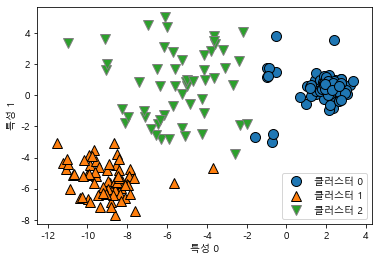

In [6]:
# k-평균 알고리즘이 실패하는 경우
X_varied, y_varied = make_blobs(n_samples=200,
                               cluster_std=[1.0, 2.5, 0.5],
                               random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

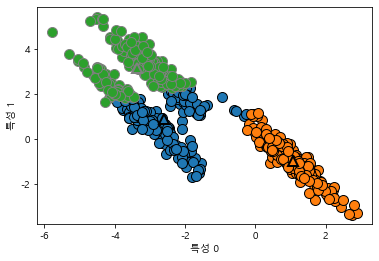

In [7]:
# 무작위로 클러스터 데이터를 생성
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냄
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

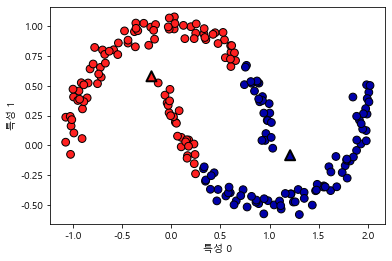

In [8]:
# two_moons 데이터를 통해 다시 확인
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시
plt.scatter(X[:,0 ], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
                         edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [9]:
# 벡터 양자화 또는 분해 메서드로서의 k-평균
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, NMF

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

C:\Users\user\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'nmf')

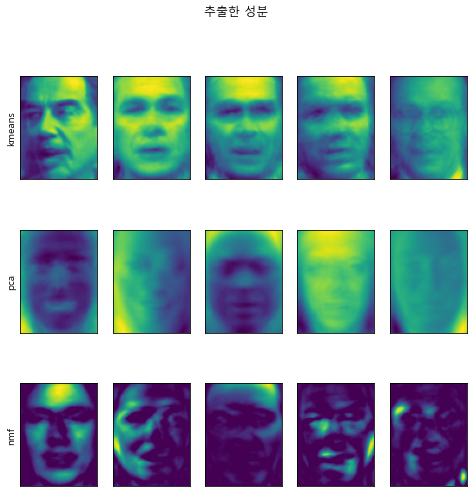

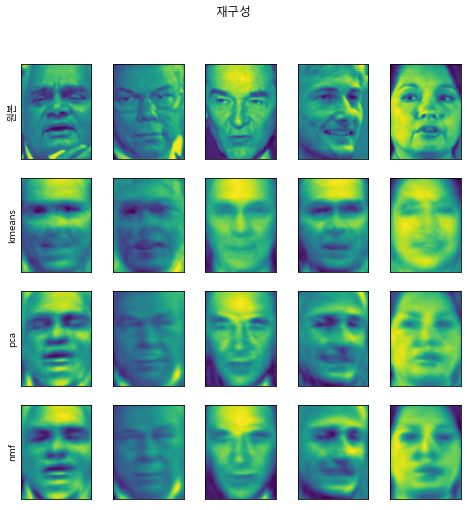

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(8,8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(8,8))
fig.suptitle("재구성")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):
    
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

클러스터 레이블 :
 [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


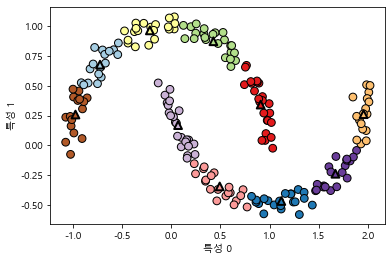

In [11]:
# 다시 two_moons 데이터를 사용 // 입력 데이터의 차원보다 더 많은 클러스터를 사용
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
           marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
           edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블 :\n", y_pred)

In [12]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태:", distance_features.shape)
print("클러스터 거리:\n", distance_features)

클러스터 거리 데이터의 형태: (200, 10)
클러스터 거리:
 [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


## 3.5.2 병합 군집

Text(0, 0.5, '특성1')

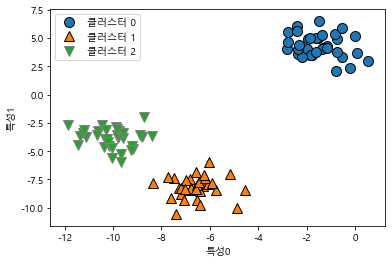

In [13]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성0")
plt.ylabel("특성1")

Text(0, 0.5, '클러스터 거리')

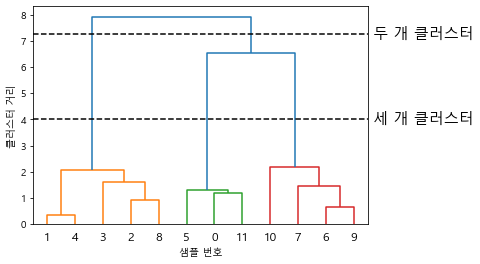

In [14]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkages_array를 사용해 덴드로그램을 그림
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플 번호')
plt.ylabel('클러스터 거리')

## DBSCAN

In [15]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Text(0.5, 0, '특성 1')

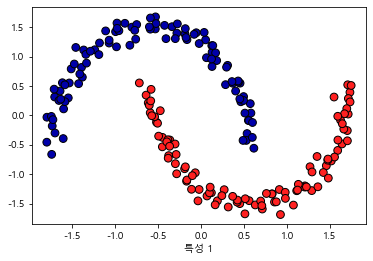

In [16]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60,
           edgecolors='black')
plt.xlabel("특성 0")
plt.xlabel("특성 1")

## 군집 알고리즘 비교 및 평가

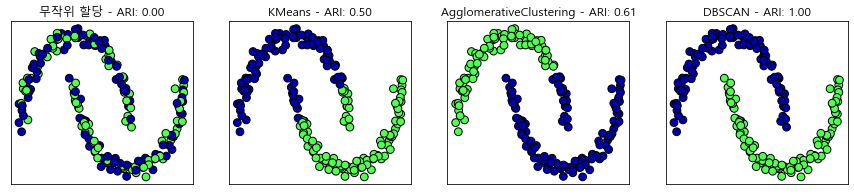

In [17]:
# ARI를 사용해서 k-평균, 병합 군집, DBSCAN 비교
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw={'xticks': (), 'yticks': ()})

# 사용할 알고리즘 모델을 리스트로 만듦
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당 클러스터를 그림
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그림
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
              cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y, clusters)))


In [18]:
from sklearn.metrics import accuracy_score

# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


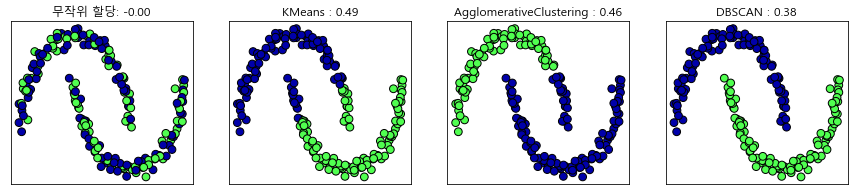

In [23]:
# 실루엣 계수로 비교
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig,axes = plt.subplots(1, 4, figsize=(15, 3),
                       subplot_kw={'xticks':(), 'yticks': ()})

# 비교를 위해 무작위로 클러스터 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그림
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그림
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1],c=clusters, cmap=mglearn.cm3,
              s=60, edgecolors='black')
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))

## 얼굴 데이터셋으로 군집 알고리즘 비교

In [25]:
# LFW 데이터에서 고유얼글을 찾은 다음 데이터를 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [26]:
# DBSCAN으로 얼굴 데이터셋 분석
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [27]:
# 전부 잡음 포인트로 레이블 되었음 -> eps나 min_samples를 변경
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


In [28]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1  0]


In [29]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셈
# bincount는 음수를 받을 수 없어서 labels에 1을 더했음
# 반환값의 첫 번째 원소는 잡음 포인트의 수
print("클러스터별 포인트 수:", np.bincount(labels + 1))

클러스터별 포인트 수: [  32 2031]


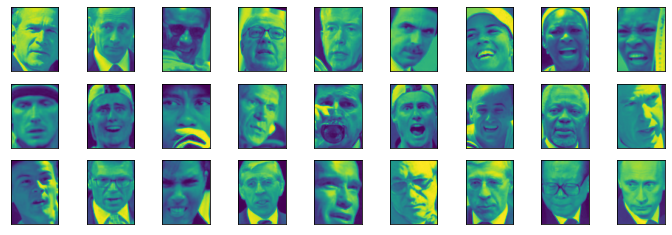

In [33]:
#  잡음 포인트를 직접 확인
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                       figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [35]:
# eps에 따른 클러스터 수
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps= 1
클러스터 수: 1
클러스터 크기: [2063]

eps= 3
클러스터 수: 1
클러스터 크기: [2063]

eps= 5
클러스터 수: 1
클러스터 크기: [2063]

eps= 7
클러스터 수: 14
클러스터 크기: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
클러스터 수: 4
클러스터 크기: [1307  750    3    3]

eps= 11
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps= 13
클러스터 수: 2
클러스터 크기: [ 120 1943]


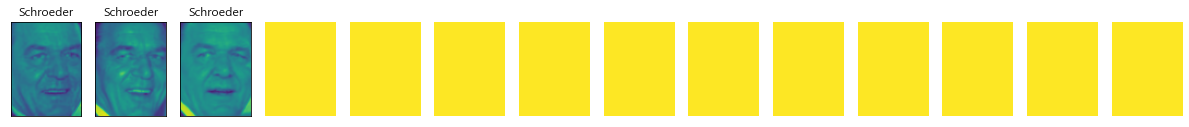

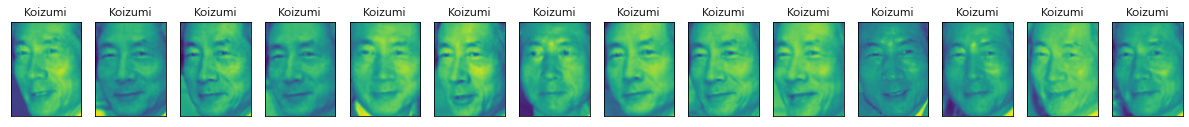

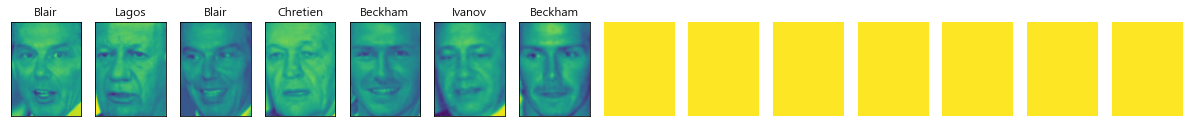

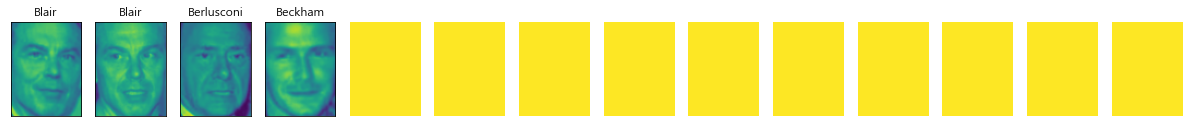

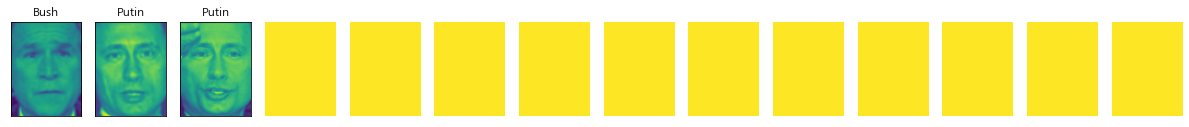

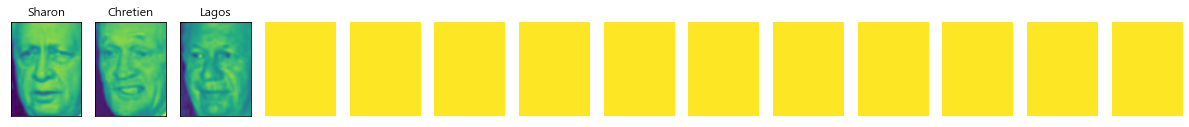

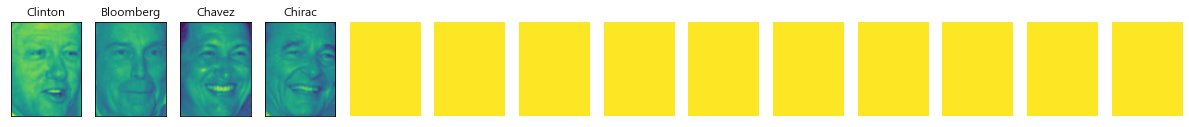

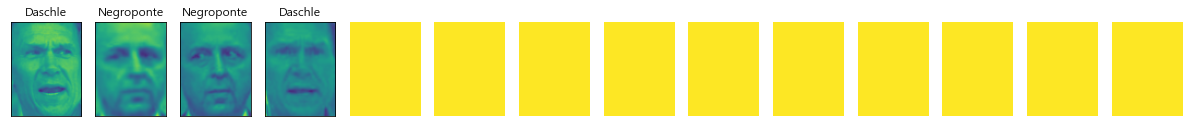

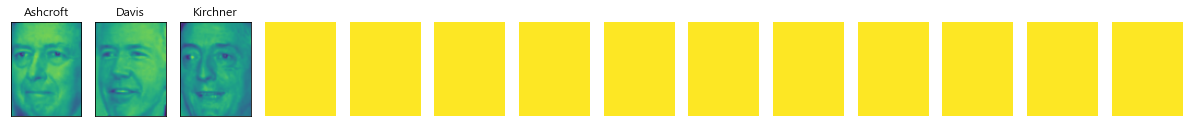

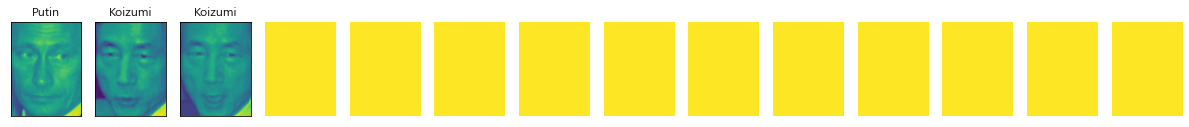

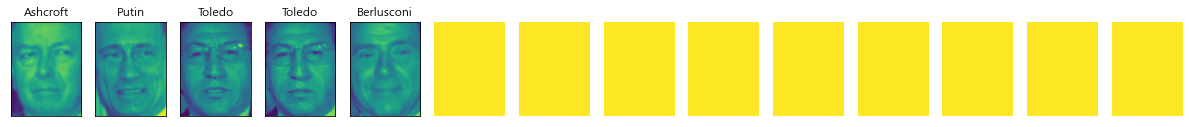

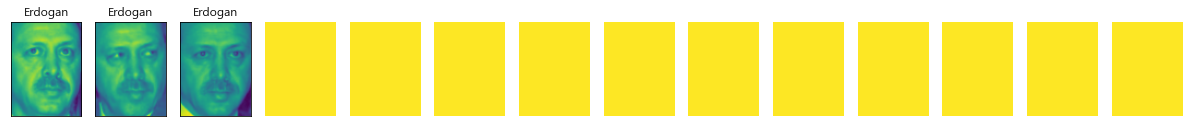

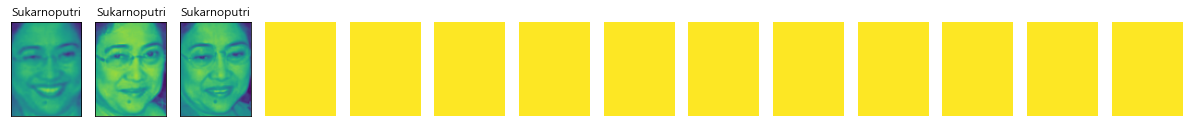

In [42]:
# eps=7의 결과 시각화
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                            subplot_kw={"xticks" : (), "yticks" : ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

In [47]:
# k-평균으로 클러스터 추출
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

k-평균의 클러스터 크기: [282 226 105 268 151 324 202 208 208  89]


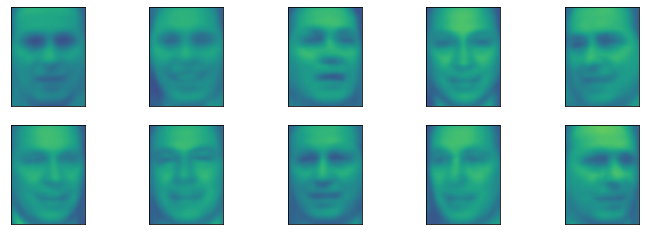

In [48]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                        figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
             vmin=0, vmax=1)

In [49]:
# 병합 군집으로 클러스터 추출
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

병합 군집의 클러스터 크기: [169 660 144 329 217  85  18 261  31 149]


In [50]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.10


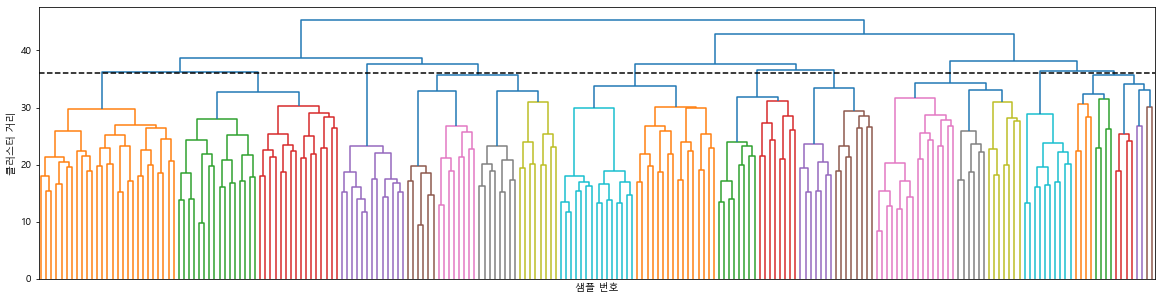

In [51]:
# 덴드로그램
linkage_array = ward(X_pca)
# 클러스터 사이의 거리가 담겨 있는 linkage_array로 덴드로그램을 그림
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [36, 36], '--', c='k')

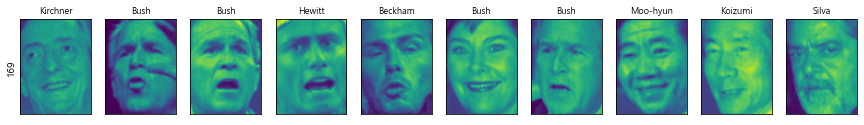

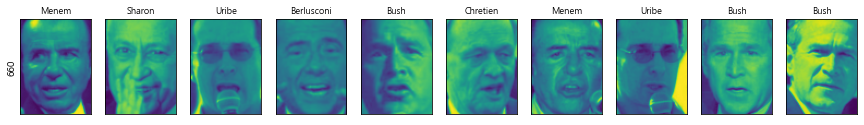

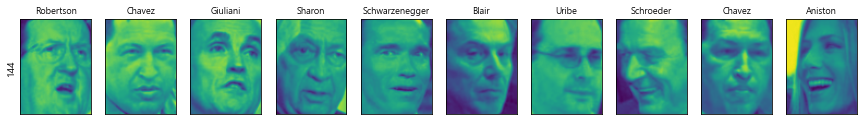

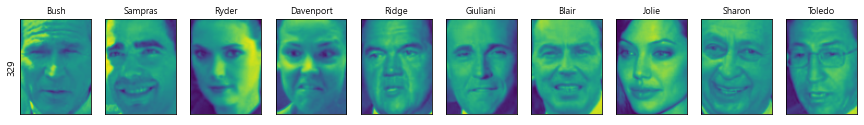

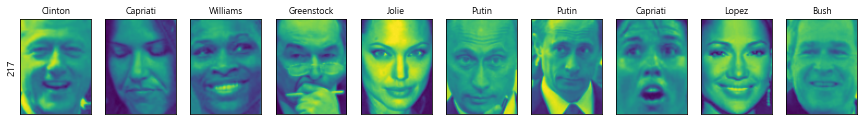

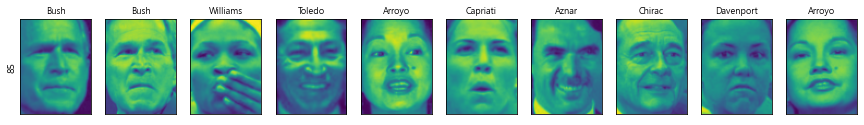

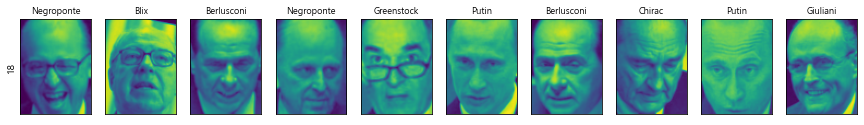

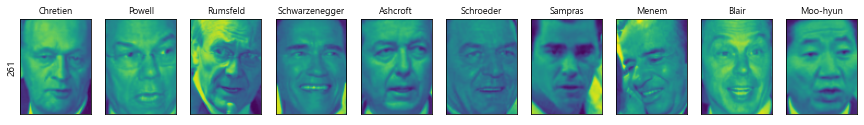

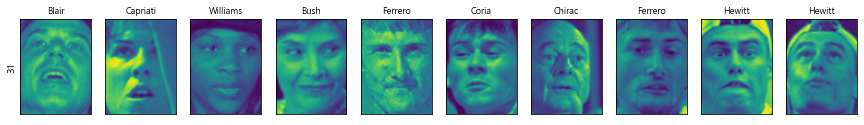

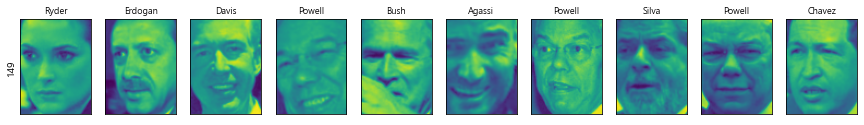

In [52]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                            figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], 
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize':9})
        

병합 군집의 클러스터 크기: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


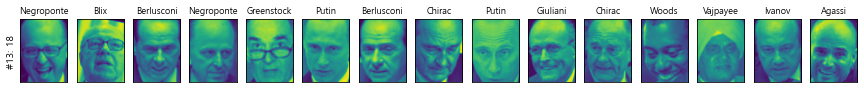

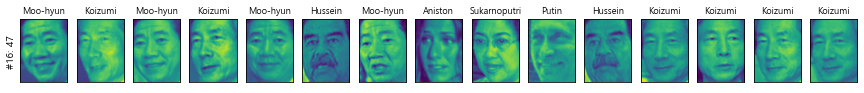

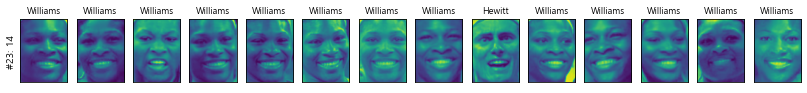

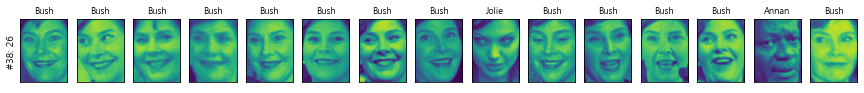

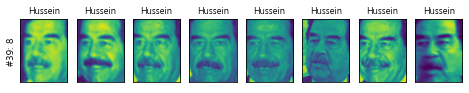

In [64]:
# 병합 군집으로 클러스터를 추출
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("병합 군집의 클러스터 크기:", np.bincount(labels_agg))

n_clusters = 40
for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks':(), 'yticks':()},
                            figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], 
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                    fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)